# Polytech SI3 - Données numériques
Diane Lingrand

Diane.Lingrand@univ-cotedazur.fr

2022-2023

# Cours 3 - kNN

In [196]:
#chargement des librairies
import numpy as np
import matplotlib.pyplot as plt
import pickle

## kNN in dimension 2

### simple synthetic data for debuging

We will start with few data (2d points) arranged in a regular grid and two classes: 0 and 1.

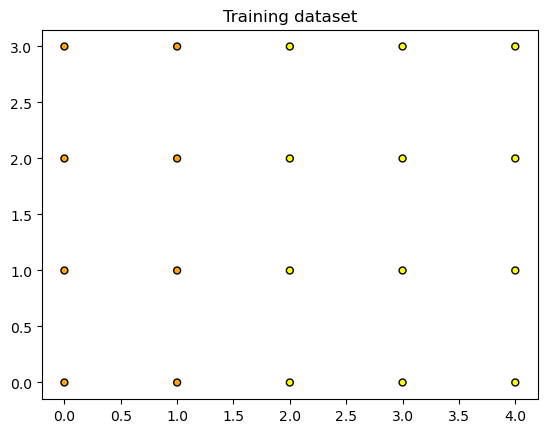

In [197]:
nbClasses = 2
# the 2d points
Xtrain =np.mgrid[0:4.1:1, 0:3.1:1].reshape(2,-1).T
# the classes
yTrain = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1]
# the vector of colors for drawing purpose
colors = np.array(["orange","yellow", "black"])
# let draw the points using colored circles with black edges
plt.title("Training dataset")
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], marker="o", c=colors[yTrain], s=25, edgecolor="k")

Set a variable 'kNN' to the number of neighbors you would like to consider (start with 5). A new point will be denoted by 'newX'.

In [198]:
newX = [0.5,1]
nKNN = 5

**Question 1:** Compute all Euclidean distances between this new point and all points in the training dataset. You will need [numpy.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) and [numpy.sqrt](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html) functions.

In [199]:
#list of all distances

def euclideanDist(pa, pb) -> float:
    return np.sqrt(
            np.power(pa[0] - pb[0], 2) +
            np.power(pa[1] - pb[1], 2))

distances = list(map(lambda p: euclideanDist(newX, p), Xtrain))
print(distances)

[1.118033988749895, 0.5, 1.118033988749895, 2.0615528128088303, 1.118033988749895, 0.5, 1.118033988749895, 2.0615528128088303, 1.8027756377319946, 1.5, 1.8027756377319946, 2.5, 2.692582403567252, 2.5, 2.692582403567252, 3.2015621187164243, 3.640054944640259, 3.5, 3.640054944640259, 4.031128874149275]


**Question 2:** Sort the distances and build an array of indices of training points using [numpy.argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)

In [200]:
closest_points = np.argsort(distances)
print(closest_points)

[ 1  5  0  2  6  4  9  8 10  7  3 11 13 12 14 15 17 18 16 19]


**Question 3:** Take the indices of 'nKNN' smallest distances. Build an array 'Xn' of the training points at these indices and 'yn' for the corresponding classes.

In [201]:
# nKNN smallest distances indices
nei = closest_points[:nKNN]

# nKNN closest data
Xn = np.array([Xtrain[i] for i in nei])
yn = [yTrain[i] for i in nei]

print(nei)
print(Xn)
print(yn)

[1 5 0 2 6]
[[0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 2.]
 [1. 2.]]
[0, 0, 0, 0, 0]


**Question 4:** Using 'yn' compute the majority vote. Don't consider ambiguity now. [numpy.unique](https://numpy.org/doc/stable/reference/generated/numpy.unique.html) and [numpy.argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) will be useful.

In [202]:
# majority vote for the class
classes, counts = np.unique(yn, return_counts=True)

classe = classes[np.argmax(counts)]

print("classe = ", classe)

classe =  0


**Question 4bis:** The same but highlight the ambiguity by assigning the classe 'nbClasses' 

In [203]:
# majority vote for the class
max_classe = np.max(counts)
candidate_count = np.count_nonzero(counts == max_classe)
if candidate_count > 1:
    classe = None # draw    

print("classe = ", classe)

classe =  0


**Question 5:** Plot the training dataset as before. In addition, plot the neighbors point using size 100 instead of 25. Plot the new point using '.' marker, in red. Play with the parameter k and the position of this new point.
    

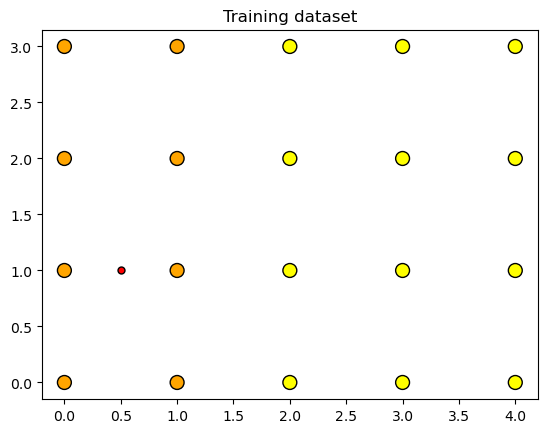

In [204]:
thetitle = str(nKNN)+"-NN neighbors for new red point"
plt.title("Training dataset")

plt.scatter(Xtrain[:, 0],
            Xtrain[:, 1],
            marker="o",
            c=colors[yTrain],
            s=100,
            edgecolor="k")

plt.scatter(newX[0], newX[1], marker=".", c="red", s=100, edgecolor="k")

**Question 6:** Put everything in the next function and return the class.

In [211]:
def voteKnn(xtrain, ytrain, nKnn, newData):
    def euclideanDist(pa, pb) -> float:
        return np.sqrt(np.power(pa[0] - pb[0], 2) + np.power(pa[1] - pb[1], 2))

    distances = list(map(lambda p: euclideanDist(p, newData), xtrain))

    closest_points = np.argsort(distances)

    # nKNN smallest distances indices
    nei = closest_points[:nKnn]

    # nKNN closest data
    yn = [ytrain[i] for i in nei]

    classes, counts = np.unique(yn, return_counts=True)

    # remove ambiguity
    max_classe_idx = np.argmax(counts)
    max_classe = np.max(counts)
    candidate_count = np.count_nonzero(counts == max_classe)
    if candidate_count > 1:
        return None
    
    return classes[max_classe_idx]

**Question 6bis:** Test this function on the previous new point.

In [206]:
voteKnn(Xtrain, yTrain, nKNN, newX)

0

**Question 7:** Compute the class of all the points on a higher resolution grid and plot the result (new points will be plotted with a marker '.'). Do you agree with the results?

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

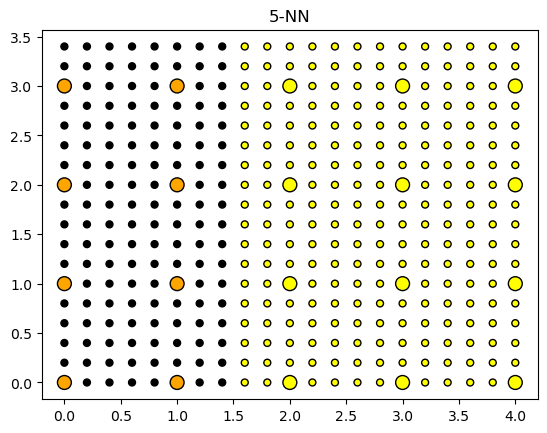

In [212]:
xTest=np.mgrid[0:4.2:0.2, 0:3.6:0.2].reshape(2,-1).T
half_count = round(len(xTest) / 2)

thetitle = str(nKNN)+'-NN'
plt.title(thetitle)

classes = [voteKnn(Xtrain, yTrain, nKNN, p) for p in xTest]
classes = [c if c else nbClasses for c in classes] # replace None with right color
print(classes)

plt.scatter(xTest[:, 0],
            xTest[:, 1],
            marker=".",
            c=colors[classes],
            s=100,
            edgecolor="k")

plt.scatter(Xtrain[:, 0],
            Xtrain[:, 1],
            marker="o",
            c=colors[yTrain],
            s=100,
            edgecolor="k")


### more complex synthetic data

In this part, you will load another dataset. You first need to download this file: http://www.i3s.unice.fr/~lingrand/si3/datasetRandom.pickle and then run the next cell.

In [187]:
with open('datasetRandom.pickle', 'rb') as input:
    Xd, yd = pickle.load(input)


**Question 8:** Plot the dataset.

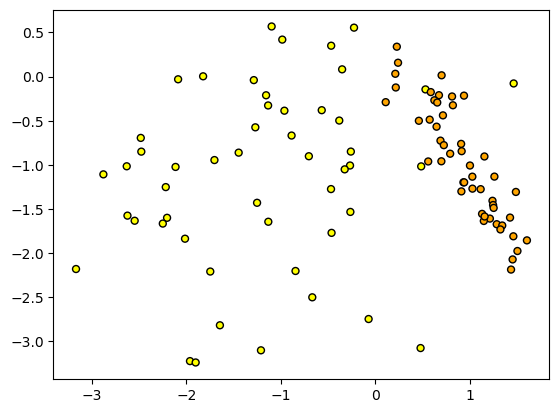

In [188]:
plt.scatter(Xd[:, 0],
            Xd[:, 1],
            marker="o",
            c=colors[yd],
            s=25,
            edgecolor="k")

In [189]:
# use the first 60% for the training and the last 40% for the test
Xtrain = Xd[:60]
yTrain = yd[:60]
Xtest = Xd[60:]
yTest = yd[60:]

**Question 9:** Compute the label of the test set from the values of the training set. Plot the training set using round markers with black edge and plot the testing set without the black edge and using the predicted colors. If true class (yTest) and the predicted class do not match, add a red edge.

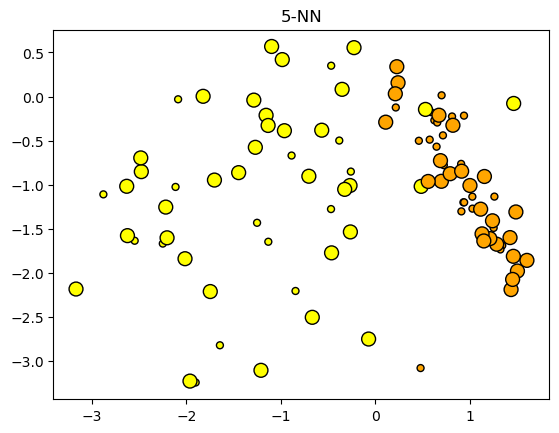

In [190]:
thetitle = str(nKNN) + '-NN'
plt.title(thetitle)

classes = [voteKnn(Xtrain, yTrain, nKNN, p) for p in Xtest]

plt.scatter(Xtest[:, 0],
            Xtest[:, 1],
            marker=".",
            c=colors[classes],
            s=100,
            edgecolor="k")

plt.scatter(Xtrain[:, 0],
            Xtrain[:, 1],
            marker="o",
            c=colors[yTrain],
            s=100,
            edgecolor="k")


**Question 10:**: Could you build a numerical metric for the classification evaluation?

In [191]:
# your work

## multi-class kNN (dimension 2)

**Question 11:** Same questions using more than 2 classes. Be careful of the tables of colors.

In [192]:
# your work

## multi-class kNN in any dimension (>2)

The difficulty with this part is that you can no long plot the data ...

**Question 12:** Same questions (except plottings) using more than 2 dimensions.

In [193]:
# your work

## kdTree

If you reach this part, you are skilled enough to also implement the kd-tree! Start with 2d data.